<a href="https://colab.research.google.com/github/rajesh0305/Machine_Learning_Assignment/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Some methods for hyperparameter tuning in machine learning include:
1. **Grid search:**
A method that evaluates every possible combination of hyperparameter values. It's a thorough method, but it's also computationally expensive.
2. **Random search:**
A method that randomly selects a combination of hyperparameter values. It's simple to implement, but it may not be as effective as grid search.
3. **Bayesian optimization:**
A probabilistic method that uses a model to predict how well a model will perform for different hyperparameter values. It iteratively updates the model based on its performance.


## Grid-Search

Grid search can be considered as a “brute force” approach to hyperparameter optimization. We fit the model using all possible combinations after creating a grid of potential discrete hyperparameter values. We log each set’s model performance and then choose the combination that produces the best results. This approach is called GridSearchCV, because it searches for the best set of hyperparameters from a grid of hyperparameters values.

An exhaustive approach that can identify the ideal hyperparameter combination is grid search. But the slowness is a disadvantage. It often takes a lot of processing power and time to fit the model with every potential combination, which might not be available.

In [ ]:
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
# GridSearch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC#support vector classification

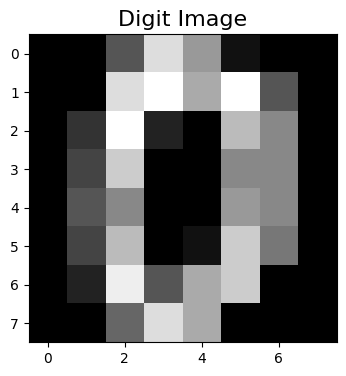

(1797, 64)
(1797,)


In [ ]:
# Loading the Digits dataset
digits = datasets.load_digits()

# Set figure size for clarity
plt.figure(figsize=(4, 4))  # Adjust size as needed

# Display the first image in the dataset
plt.imshow(digits.images[0], cmap='gray', interpolation='nearest')

# Add title and remove axes for a cleaner look
plt.title("Digit Image", fontsize=16)
#plt.axis('off')

# Show the image
plt.show()


# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

print(X.shape)
print(y.shape)

In [ ]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

In [ ]:
print(X_train.shape,"shape of the x training data")
print(X_test.shape,"shape of the x test data")
print(y_train.shape,"shape of the y train data")
print(y_test.shape,"shape of the y test data")

(898, 64) shape of the x training data
(899, 64) shape of the x test data
(898,) shape of the y train data
(899,) shape of the y test data


In [ ]:


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on test-set:")
    print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.


# Tuning hyper-parameters for precision

Best parameters set found on train set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on train set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report on test-set:


              precision    recall  f1-score   support

           0       

**Drawback:** GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive.  

## Random-Search

As the name suggests, the random search method selects values at random as opposed to the grid search method’s use of a predetermined set of numbers. Every iteration, random search attempts a different set of hyperparameters and logs the model’s performance. It returns the combination that provided the best outcome after several iterations. This approach reduces unnecessary computation.

RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in a random fashion to find the best set of hyperparameters. The advantage is that, in most cases, a random search will produce a comparable result faster than a grid search.

In [ ]:
# RandomSearch CV
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html

# import numpy as np

# from time import time
# import scipy.stats as stats
# from sklearn.utils.fixes import loguniform

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.datasets import load_digits
# from sklearn.linear_model import SGDClassifier

# RandomSearch CV
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html

import numpy as np

from time import time
import scipy.stats as stats
# Import loguniform directly from scipy.stats
from scipy.stats import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

In [ ]:
# get some data
X, y = load_digits(return_X_y=True)

# build a classifier
clf = SGDClassifier(loss='hinge', penalty='elasticnet',
                    fit_intercept=True)


In [ ]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:

# specify parameters and distributions to sample from
param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {'average': [True, False],
              'l1_ratio': np.linspace(0, 1, num=10),
              'alpha': np.power(10, np.arange(-4, 1, dtype=float))}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


RandomizedSearchCV took 29.82 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.927 (std: 0.024)
Parameters: {'alpha': 0.00023298709750733533, 'average': True, 'l1_ratio': 0.17558265298822895}

Model with rank: 2
Mean validation score: 0.927 (std: 0.023)
Parameters: {'alpha': 0.0025843247443435844, 'average': False, 'l1_ratio': 0.2512311606199661}

Model with rank: 3
Mean validation score: 0.925 (std: 0.028)
Parameters: {'alpha': 0.00026984375308292086, 'average': True, 'l1_ratio': 0.18218869867672927}



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

GridSearchCV took 123.30 seconds for 100 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.930 (std: 0.025)
Parameters: {'alpha': 0.0001, 'average': True, 'l1_ratio': 0.3333333333333333}

Model with rank: 2
Mean validation score: 0.929 (std: 0.031)
Parameters: {'alpha': 1.0, 'average': False, 'l1_ratio': 0.0}

Model with rank: 3
Mean validation score: 0.928 (std: 0.028)
Parameters: {'alpha': 0.0001, 'average': True, 'l1_ratio': 0.1111111111111111}



**Drawback:** It’s possible that the outcome could not be the ideal hyperparameter combination is a disadvantage.

## Bayesian Optimization

Grid search and random search are often inefficient because they evaluate many unsuitable hyperparameter combinations without considering the previous iterations’ results. Bayesian optimization, on the other hand, treats the search for optimal hyperparameters as an optimization problem. It considers the previous evaluation results when selecting the next hyperparameter combination and applies a probabilistic function to choose the combination that will likely yield the best results. This method discovers a good hyperparameter combination in relatively few iterations.

Data scientists use a probabilistic model when the objective function is unknown. The probabilistic model estimates the probability of a hyperparameter combination’s objective function result based on past evaluation results.

P(score(y)|hyperparameters(x))

It is a “surrogate” of the objective function, which can be the root-mean-square error (RMSE), for example. The objective function is calculated using the training data with the hyperparameter combination, and we try to optimize it (maximize or minimize, depending on the objective function selected).

Applying the probabilistic model to the hyperparameters is computationally inexpensive compared to the objective function. Therefore, this method typically updates and improves the surrogate probability model every time the objective function runs. Better hyperparameter predictions decrease the number of objective function evaluations needed to achieve a good result. Gaussian processes, random forest regression, and tree-structured Parzen estimators (TPE) are examples of surrogate models.

The Bayesian optimization model is complex to implement, but off-the-shelf libraries like Ray Tune can simplify the process. It’s worth using this type of model because it finds an adequate hyperparameter combination in relatively few iterations. However, compared to grid search or random search, we must compute Bayesian optimization sequentially, so it doesn’t allow distributed processing. Therefore, Bayesian optimization takes longer yet uses fewer computational resources.

**Drawback:** Requires an understanding of the underlying probabilistic model.

In [ ]:
#HyperOPT: Bayesian Optimization

#Refer: https://hyperopt.github.io/hyperopt-sklearn/

In [ ]:
!pip install hpsklearn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.9 MB/s eta 0:00:00
  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-py3-none-any.whl size=23915 sha256=4613d1789ea4a84d56afa416c568de176f3c685e7f56a999b71ba3c1574cd120
  Stored in directory: /root/.cache/pip/wheels/ee/2b/cb/8d65e5b43304430c0868e91897d0d12bdbe3a72eefa5d3482f
Successfully built hpsklearn


In [ ]:
from hpsklearn import HyperoptEstimator

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [ ]:
# from hpsklearn import HyperoptEstimator, any_classifier
# from sklearn.datasets import fetch_openml
# from hyperopt import tpe
# import numpy as np

# # Download the data and split into training and test sets

# digits = fetch_openml('mnist_784')

# X = digits.data
# y = digits.target

# test_size = int( 0.2 * len( y ) )
# np.random.seed( 100 )
# indices = np.random.permutation(len(X))
# X_train = X[ indices[:-test_size]]
# y_train = y[ indices[:-test_size]]
# X_test = X[ indices[-test_size:]]
# y_test = y[ indices[-test_size:]]

# estim = HyperoptEstimator( classifier=any_classifier('clf'),
#                             algo=tpe.suggest, trial_timeout=300)

# estim.fit( X_train, y_train )

# print( estim.score( X_test, y_test ) )
# # <<show score here>>
# print( estim.best_model() )
# # <<show model here>>
from hpsklearn import HyperoptEstimator, any_classifier
from sklearn.datasets import fetch_openml
from hyperopt import tpe
import numpy as np

   # Download the data and split into training and test sets
   # Increased n_retries to 3 and delay to 5 seconds
digits = fetch_openml('mnist_784', n_retries=3, delay=5)

X = digits.data
y = digits.target

test_size = int(0.2 * len(y))
np.random.seed(100)
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test = X[indices[-test_size:]]
y_test = y[indices[-test_size:]]

estim = HyperoptEstimator(classifier=any_classifier('clf'),
                             algo=tpe.suggest, trial_timeout=300)

estim.fit(X_train, y_train)

print(estim.score(X_test, y_test))
   # <<show score here>>
print(estim.best_model())
   # <<show model here>>

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/status/active/. Retrying...
  warn(


URLError: <urlopen error [Errno 110] Connection timed out>